In [111]:
from pathlib import Path
import json
import pandas as pd

In [112]:
def sentenceDistrubution(file_path):
    file=file_path.split(".")[0]
    summary_path = Path(file_path)
    summary_docs = json.loads(summary_path.read_text())
    summary_sums = [[x[0] for x in d["summary"]] for d in summary_docs]
    
    summary_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(summary_docs, key=lambda x: x["num_sents"])]
    
    _x = []
    _y = []
    _a = []
    
    for i,p in enumerate(summary_positions):
        _x += [i for _ in p]
        _y += p
        _a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]
        
    FONTSIZE = 90
    FIG_X = 30
    FIG_Y = 15

    df_ = pd.DataFrame()
    df_["Position"] = _y
    df_["Document"] = _x

    plt1 = df_.plot(x="Document", y="Position",
                          kind="scatter",  figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
    plt1.set_xlabel("Documents", size = FONTSIZE)
    plt1.set_ylabel("", size = FONTSIZE)

    plt1.set_yticks([0.1,0.9])
    plt1.set_yticklabels(["start","end"], rotation=90, va="center")
    plt1.set_xticklabels([])
    
    figureName=file+".png"

    plt1.figure.savefig(figureName)

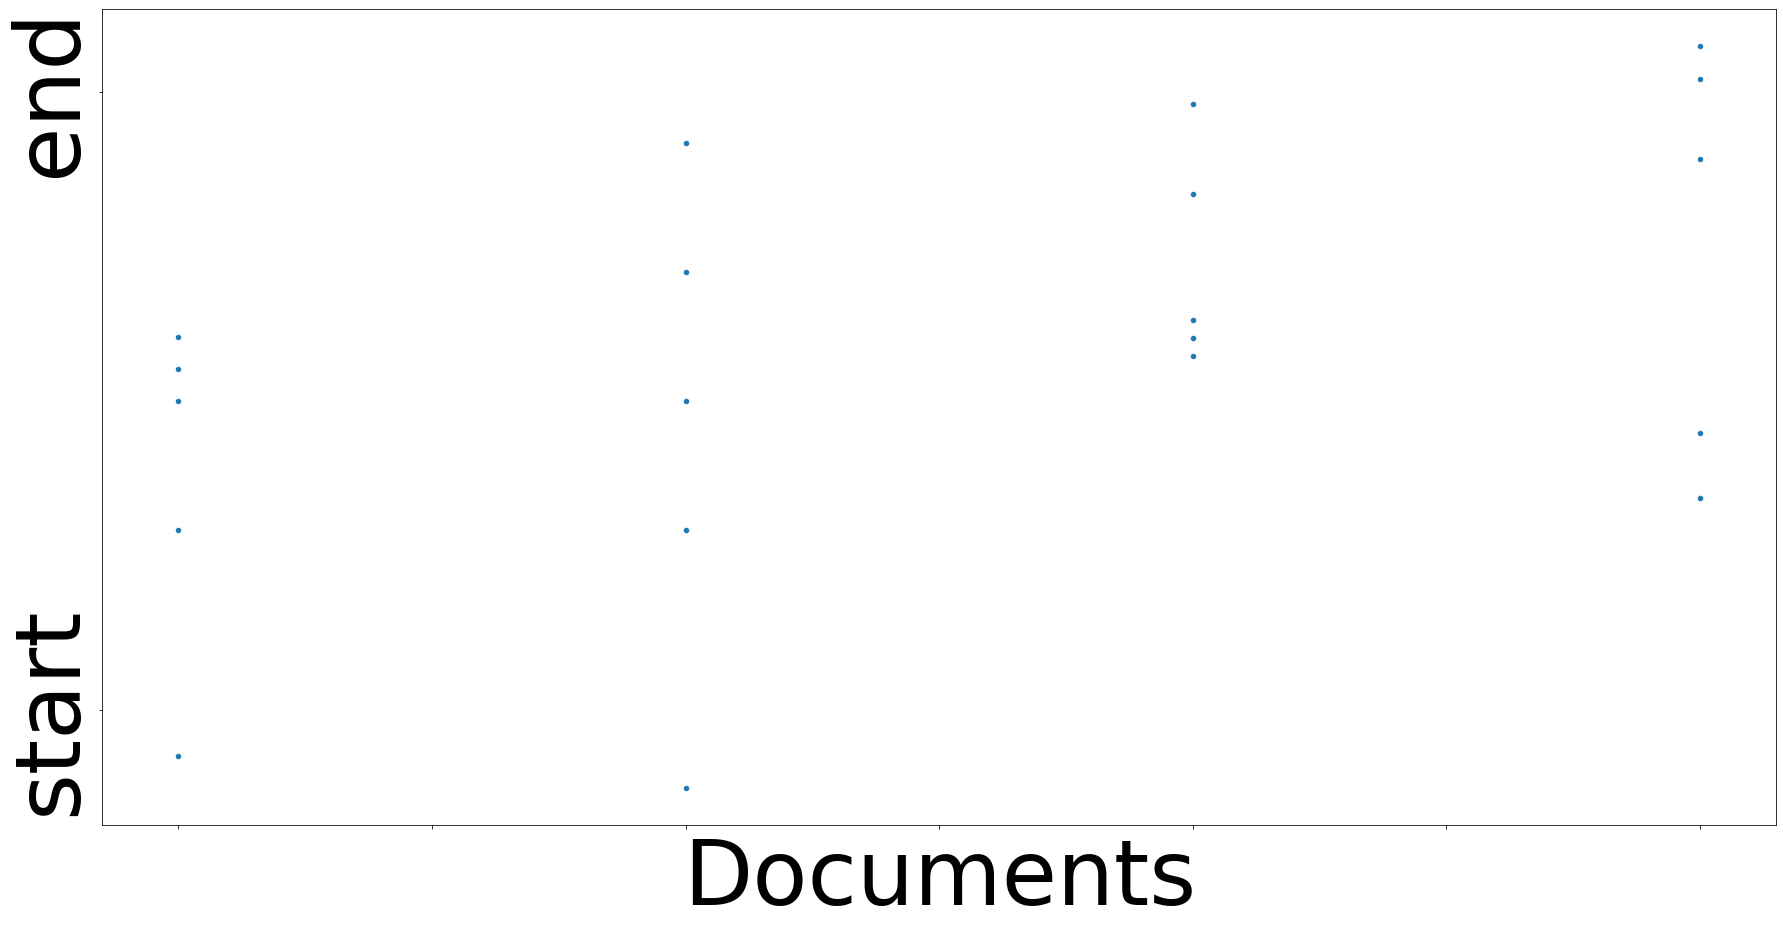

In [113]:
sentenceDistrubution("GrinchSentenceDistrubtionsOfSummariesnli-distilroberta-base-v2CNNDM.json")